# World Health Data Cleaning, Exploration, and Visualization
--------------------------
<p style='text-align: right;'> 02_Removing_NaN.ipynb </p>
<p style='text-align: right;'> October 19 2020, David Diston </p>

### Removing Variables with a High Proportion of NaN Values
----------------
Based on the work of the introductory notebook `01_Introduction.ipynb` (data transposition, and data density calculations) I have the information I need to make reasoned reductions to the dataframe, by removing independent variables that contain a substantial proportion of NaN values. To acomplish this I will use the `data_density.csv` file I created, and establish a minimum data density cut-off for variables to remain in the dataset. Independent variables that do not meet this threshhold will be removed from the transposed `raw_health.csv` file.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# I am going to use the data from 'data_density.csv' to identify raw_health.csv columns with sufficient data for analysis

data_density = pd.read_csv('data_density.csv')

In [3]:
# sanity check

data_density.head()

,Country Name,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female","Age at first marriage, male",...,Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),Use of any antimalarial drug (% of pregnant women),Use of insecticide-treated bed nets (% of under-5 population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%),Average Data Density,Max Data Proportion
0,Arab World,0.0,0.0,98.21,0.0,0.0,0.0,0.0,0.0,0.0,...,98.21,0.0,0.0,0.0,0.0,0.00,0.00,46.43,33.35,100.0
1,Caribbean small states,0.0,0.0,98.21,0.0,0.0,0.0,0.0,0.0,0.0,...,98.21,0.0,0.0,0.0,0.0,0.00,0.00,46.43,33.45,100.0
2,Central Europe and the Baltics,0.0,0.0,98.21,0.0,0.0,0.0,0.0,0.0,0.0,...,98.21,0.0,0.0,0.0,0.0,0.00,0.00,0.00,31.35,100.0
3,Early-demographic dividend,0.0,0.0,98.21,0.0,0.0,0.0,0.0,0.0,0.0,...,98.21,0.0,0.0,0.0,0.0,28.57,1.79,46.43,29.74,100.0
4,East Asia & Pacific,0.0,0.0,98.21,0.0,0.0,0.0,0.0,0.0,0.0,...,98.21,0.0,0.0,0.0,0.0,0.00,0.00,0.00,32.48,100.0


In [4]:
# I will remove all non-numeric and aggregate columns, leaving only the data independent variables

data_density.drop(['Country Name', 'Average Data Density', 'Max Data Proportion'], axis = 1, inplace = True)

In [5]:
# I will create an iterable list of all the independent variable names, and identify the aggregate row

variable_list = data_density.columns.to_list()
avg_dd_row = data_density.shape[0] - 1

##### Methodology
Below I have chosen a data density cut-off of 70%. In other words, independent variables that contain greater than 30% missing data (NaN) will be removed from the dataset. This will still result is a large number of NaN values in the dataset that will need to be dealth with. In the next notebook I will example more closely the remaining NaN values, and determine if an acceptable data imputation method can be employed, or if this data will also need to be removed for visualization and modeling.

In [6]:
'''
Using the independent variable list from above, I will create a new list of independent variables where the
average data density for that variable is less than 70%, as identified by the aggregate row values.
'''

drop_list = []
for var in variable_list:
    if data_density.loc[avg_dd_row, var] < 70:
        drop_list.append(var)
    else:
        pass
    
drop_list

['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 'Adults (ages 15+) and children (0-14 years) living with HIV',
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
 'Adults (ages 15+) living with HIV',
 'Adults (ages 15+) newly infected with HIV',
 'Age at first marriage, female',
 'Age at first marriage, male',
 'AIDS estimated deaths (UNAIDS estimates)',
 'Antiretroviral therapy coverage (% of people living with HIV)',
 'Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Births attended by skilled health staff (% of total)',
 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
 'Cause of death, by injury (% of total)',
 'C

In [7]:
# Now that I know which variables to drop, I can import my transposed health data

health = pd.read_csv('raw_health.csv')

In [8]:
# Using the drop list created above, I will drop each of these colums from the dataset

health.drop(drop_list, axis = 1, inplace = True)

In [9]:
# Sanity check that the size of the dataset has significantly been reduced

health.shape

(14448, 170)

In [10]:
# Here I can display a list of the remaining independent variables in the dataset

health.columns

Index(['Country Name', 'Year',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 0, female, interpolated',
       'Age population, age 0, male, interpolated',
       'Age population, age 01, female, interpolated',
       'Age population, age 01, male, interpolated',
       ...
       'Population, male (% of total)', 'Population, total',
       'Rural population', 'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Survival to age 65, female (% of cohort)',
       'Survival to age 65, male (% of cohort)', 'Urban population',
       'Urban population (% of total)', 'Urban population growth (annual %)'],
      dtype='object', length=170)

##### Methodology
Now that all independent variables have been removed that did not meet the 70% data density threshold, I would like to examine the data density of each country. Ensuring that each country has a high average data density for the remaining independent variables will not only make future data imputation easier, it will also allow for more effective observations, conclusions, visualizations, and modeling for all countries and independent variables in the dataset.

In [11]:
# I will create a list of all the remaining independent variables to iterate over

variable_list = health.columns.tolist()
variable_list.remove('Country Name')
variable_list.remove('Year')

country_list = health['Country Name'].unique().tolist()

# I will also create a list to be used as the column labels for my new data density dataframe

column_list = health.columns.tolist()
column_list.remove('Year')
column_list.append('Average Data Density')
column_list.append('Max Data Proportion')

In [12]:
# I start by instantiating my new dataframe, using the column list created above

data_density_2 = pd.DataFrame(columns = column_list)

'''
I begin by iterating over a list of each Country Name, filtering the transposed data by country and assigning this
data to a new temporary dataframe. By dropping the 'Country Name', and 'Year' variables I am left with only numeric
columns. 

I will instantiate a new list that will contain the proportional data for each independent variable and country. I
will also instantiate two new variables to hold the cumulative proportion of all variables per country, and the maximum
proportion of all the variables for each country.

Using a nested loop I will iterate over each independent variable, summing the number of NaN occurances, and finding
the inverse proportion of that sum based on the total number of observations (number of years). Within this loop
I will append the data density proportion for each independent variable to the new_row list. Additionally I will
add each proportion to the cumulative sum, and check the current proportion against the current max proportion.

Following the completion of the nested loop I will add the 'Country Name' to the beginning of the new_row list, as well
as append the average proportion for all independent variables for that country, and the max proportion for that country.

    Note: the max proportion will establish a reference point for countries that may have been created
    or been disolved whithin the time series range of the data.
    
I will then append the new_row list to the data_density dataframe.

Next, I will create a list of the mean of each column (independent variable) in the dataframe. To account for the 
non-numeric 'Country Name' variable, I will insert a row-label at the begining of this list. I will then append
this list of averages as the final row of the new dataframe.

Finally I will save this new data_density dataframe as a .csv file to the working directory.
'''

for i in country_list:
    df = health[health['Country Name'] == i].copy()
    df.drop('Country Name', axis = 1, inplace = True)
    df.drop('Year', axis = 1, inplace = True)
    
    new_row = []
    total_prop = 0
    max_prop = 0
    
    for j in variable_list:
        data_proportion = round((1 - (df[j].isnull().sum() / len(df[j]))) * 100, 2)
        
        if data_proportion > max_prop:
            max_prop = data_proportion
        else:
            pass
        
        total_prop += data_proportion
        new_row.append(data_proportion)
        
    new_row.insert(0, i)
    avg_prop = round(total_prop / len(variable_list) , 2)
    new_row.append(avg_prop)
    new_row.append(max_prop)
    
    data_density_2.loc[len(data_density_2)] = new_row


mean_list = data_density_2.mean().to_list()
mean_list.insert(0, 'Average Data Density')
data_density_2.loc[len(data_density_2)] = mean_list

data_density_2.to_csv('data_density_variables_removed.csv', index = False)

In [25]:
# sanity check

data_density_2.sample(10)

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated","Age population, age 02, female, interpolated",...,Rural population,Rural population (% of total population),Rural population growth (annual %),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Urban population,Urban population (% of total),Urban population growth (annual %),Average Data Density,Max Data Proportion
5,East Asia & Pacific (excluding high income),98.21,100.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00,...,100.00,100.00,98.21,98.21,98.21,100.00,100.00,98.21,48.28,100.00
91,Curacao,98.21,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,98.21,98.21,100.00,100.00,100.00,94.47,100.00
124,Haiti,98.21,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,98.21,98.21,100.00,100.00,100.00,99.88,100.00
210,Sierra Leone,98.21,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,98.21,98.21,100.00,100.00,100.00,99.88,100.00
45,Andorra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,100.00,100.00,100.00,0.00,0.00,100.00,100.00,100.00,6.28,100.00
243,Uganda,98.21,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,98.21,98.21,100.00,100.00,100.00,99.88,100.00
254,West Bank and Gaza,98.21,46.43,46.43,46.43,46.43,46.43,46.43,46.43,46.43,...,46.43,46.43,44.64,98.21,98.21,46.43,46.43,44.64,47.88,98.21
54,"Bahamas, The",98.21,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,98.21,98.21,100.00,100.00,100.00,99.54,100.00
106,Fiji,98.21,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,98.21,98.21,100.00,100.00,100.00,99.88,100.00
70,Bulgaria,98.21,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,98.21,98.21,100.00,100.00,100.00,99.66,100.00


In [14]:
'''
Now that I have created the new data density dataframe, I can iterate over this dataframe to determine the countries
where the data density does not meet the cut-off of 70%. I will add all countries that do not meet this cut-off
to a list to be dropped from the health dataframe.
'''

country_row_drop_list = []
country_name_drop_list = []

for row in data_density_2.index:
    if data_density_2.loc[row, 'Average Data Density'] < (data_density_2.loc[row, 'Max Data Proportion'] * 0.7):
        country_row_drop_list.append(row)
        country = data_density_2.loc[row, 'Country Name']
        country_name_drop_list.append(country)
    else:
        pass

In [15]:
# for curiosity and completness I would like to take a quick look at the countries that do not meet the cut-off

country_name_drop_list

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific is

In [16]:
# I will now drop all countries from the health dataframe that do not meet the cut-off, and I will save the results

for country in country_name_drop_list:
    health.drop(health[health['Country Name'] == country].index, inplace = True)

health.reset_index(drop = True, inplace = True)
health.to_csv('reduced_health.csv', index = False)

In [24]:
health.sample(10)

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated",...,"Population, male (% of total)","Population, total",Rural population,Rural population (% of total population),Rural population growth (annual %),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Urban population,Urban population (% of total),Urban population growth (annual %)
8926,Sri Lanka,1982,38.7380,66.331576,7.597659,58.733917,200182.0,207637.0,194619.0,201897.0,...,50.915107,15096000.0,12278483.0,81.336,1.677959,78.24481,66.68993,2817517.0,18.664,1.598898
9659,Togo,1987,127.0140,98.410582,5.888221,92.522361,69318.0,69661.0,66599.0,66769.0,...,49.424111,3472459.0,2522325.0,72.638,2.637758,56.93379,49.59306,950134.0,27.362,4.669655
5089,Kenya,2009,97.7964,82.893590,4.874267,78.019323,679293.0,692856.0,663283.0,675431.0,...,49.987838,39269988.0,30166027.0,76.817,2.148885,55.70454,51.36336,9103961.0,23.183,4.312098
3179,Estonia,2003,23.3278,47.422219,23.887063,23.535156,6955.0,7350.0,6295.0,6632.0,...,46.560030,1370720.0,425074.0,31.011,-0.217138,84.10612,59.59483,945646.0,68.989,-0.811590
8525,Slovak Republic,1973,42.5880,56.160568,15.161633,40.998935,43922.0,45741.0,41468.0,43268.0,...,49.297785,4641445.0,2593547.0,55.878,-0.905301,81.34992,66.08879,2047898.0,44.122,3.397517
2683,Czech Republic,2011,11.0442,43.396350,22.769294,20.627056,55971.0,59212.0,58014.0,61325.0,...,49.104228,10496088.0,2814526.0,26.815,0.468135,90.26333,79.71850,7681562.0,73.185,0.111146
6347,Mauritius,1979,60.3590,65.065574,5.672322,59.393252,10741.0,11027.0,10633.0,10858.0,...,49.271300,949888.0,545530.0,57.431,2.120654,74.08531,54.64797,404358.0,42.569,1.229714
10185,United Kingdom,2009,22.6162,51.124527,24.261885,26.862642,424012.0,445457.0,394948.0,413928.0,...,49.098387,62276270.0,11813186.0,18.969,-0.677735,90.45587,85.22179,50463084.0,81.031,1.095105
794,Barbados,1970,95.5220,83.076428,15.117696,67.958732,2197.0,2203.0,2427.0,2477.0,...,46.997869,238847.0,149186.0,62.461,0.222789,70.31409,60.79456,89661.0,37.539,0.675928
253,Antigua and Barbuda,1989,62.2322,57.660798,12.008956,45.651842,565.0,570.0,635.0,625.0,...,48.190166,61967.0,40065.0,64.655,-1.042840,76.91553,69.51148,21902.0,35.345,-0.687069


##### Methodology
Now that the majority of NaN values have been removed from the dataset, I would like to get a general impression for the remaining NaN values. This will help illustrate the scope of potential data imputation that may be required to fill out the dataframe for exploration, visualization, and modeling.

In [29]:
# how many NaN values remain in the dataset

health.isnull().sum().sum()

10423

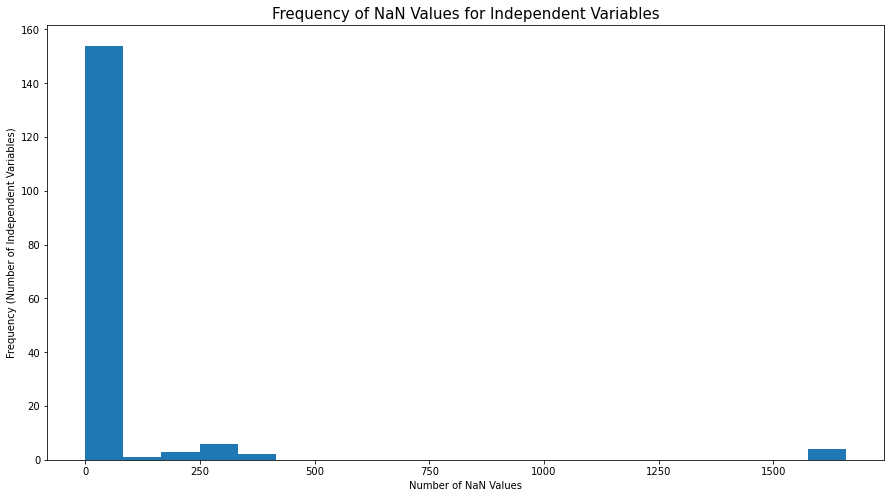

In [46]:
import matplotlib.pyplot as plt

'''
I am interested about the distribution of remaining NaN values in the dataset. Are they evenly spread out across
the dataset, or more concentrated among a few particular independent variables. A histogram of the count of NaN
values for each independent variable will help show this distribution.
'''

plt.figure(figsize = (15,8))
plt.hist(health.isnull().sum(), bins = 20)
plt.title('Frequency of NaN Values for Independent Variables', fontsize = 15)
plt.xlabel('Number of NaN Values', fontsize = 10)
plt.ylabel('Frequency (Number of Independent Variables)', fontsize = 10)
plt.show()

##### Observations
It appears as though there are still a significant number of missing values in the dataset (10,423). Most of these missing values however appear to be conentrated in only a few independent variables, with the vast majority of independent variables having very few or no missing data. From these observations, I am confident that reasonable data imputation can be undertaken to fill out the dataframe for the majority of independent variables. Those independent variables that contain a high proportion of NaN values will have to be looked at in more detail to determine if data imputation is appropriate. 

#### Future Steps
---------------
In the next step of this project I will take each of the remaining independent variables in turn to determine their candidacy for data imputation, and if imputation is a reasonable choice, which type of imputation is best.